# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression, mutual_info_classif, SelectPercentile, SelectPercentile
from sklearn.feature_selection import chi2
from scipy import stats

# Loading Dataset

In [ ]:
# Use this instead
property_data = pd.read_csv('Transactions with MRT, Bus, Taxi, Crime, Ratings.csv') # https://drive.google.com/uc?export=download&id=1de6-GH3LUBItIUSR41FDCnYNB4Hb2Dgo
property_data

,street,x,project,y,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,...,distance_from_nearest_stop,nearest_stop_lat_long,nearest_taxi_stand,distance_from_nearest_taxi_stand,nearest_taxi_stand_lat_long,nearest_taxi_stand_walking_time,nearest_taxi_stand_walking_distance,npc,crime_rate_ranking,rating
0,ZEHNDER ROAD,22734.92530,LANDED HOUSING DEVELOPMENT,29502.42071,RCR,524.3,-,1,220,3,...,0.201405,"(1.28290732015735, 103.78781105381566)",Pasir Panjang Rd outside Haw Par Villa CCL Sta...,0.481392,"(1.283306206, 103.78169)",NaN,NaN,Queenstown,10,4.8
1,ZEHNDER ROAD,22734.92530,LANDED HOUSING DEVELOPMENT,29502.42071,RCR,308.0,-,1,918,3,...,0.201405,"(1.28290732015735, 103.78781105381566)",Pasir Panjang Rd outside Haw Par Villa CCL Sta...,0.481392,"(1.283306206, 103.78169)",NaN,NaN,Queenstown,10,4.8
2,ZEHNDER ROAD,22734.92530,LANDED HOUSING DEVELOPMENT,29502.42071,RCR,314.0,-,1,618,3,...,0.201405,"(1.28290732015735, 103.78781105381566)",Pasir Panjang Rd outside Haw Par Villa CCL Sta...,0.481392,"(1.283306206, 103.78169)",NaN,NaN,Queenstown,10,4.8
3,ZEHNDER ROAD,22734.92530,LANDED HOUSING DEVELOPMENT,29502.42071,RCR,308.0,-,1,921,3,...,0.201405,"(1.28290732015735, 103.78781105381566)",Pasir Panjang Rd outside Haw Par Villa CCL Sta...,0.481392,"(1.283306206, 103.78169)",NaN,NaN,Queenstown,10,4.8
4,NEO PEE TECK LANE,20914.19890,LANDED HOUSING DEVELOPMENT,30589.10708,RCR,159.3,-,1,320,3,...,0.117683,"(1.29201138346787, 103.76908420716119)",Pasir Panjang Rd outside Haw Par Villa,1.636447,"(1.28376027, 103.7812063)",NaN,NaN,Clementi,19,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,FABER HEIGHTS,19547.85969,FABER CREST,33943.45546,OCR,96.0,1-May,1,822,3,...,0.227100,"(1.32425805601593, 103.7591472219987)",Commonwealth Ave West outside Clementi MRT Sta...,1.400891,"(1.313697769, 103.7656452)",NaN,NaN,Clementi,19,4.1
23699,FABER HEIGHTS,19547.85969,FABER CREST,33943.45546,OCR,94.0,1-May,1,223,3,...,0.227100,"(1.32425805601593, 103.7591472219987)",Commonwealth Ave West outside Clementi MRT Sta...,1.400891,"(1.313697769, 103.7656452)",NaN,NaN,Clementi,19,4.1
23700,FABER HEIGHTS,19547.85969,FABER CREST,33943.45546,OCR,173.0,1-May,1,1022,3,...,0.227100,"(1.32425805601593, 103.7591472219987)",Commonwealth Ave West outside Clementi MRT Sta...,1.400891,"(1.313697769, 103.7656452)",NaN,NaN,Clementi,19,4.1
23701,FABER HEIGHTS,19547.85969,FABER CREST,33943.45546,OCR,94.0,1-May,1,1222,3,...,0.227100,"(1.32425805601593, 103.7591472219987)",Commonwealth Ave West outside Clementi MRT Sta...,1.400891,"(1.313697769, 103.7656452)",NaN,NaN,Clementi,19,4.1


In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   street                               23703 non-null  object 
 1   x                                    23702 non-null  float64
 2   project                              23703 non-null  object 
 3   y                                    23702 non-null  float64
 4   marketSegment                        23703 non-null  object 
 5   area                                 23703 non-null  float64
 6   floorRange                           23703 non-null  object 
 7   noOfUnits                            23703 non-null  int64  
 8   contractDate                         23703 non-null  int64  
 9   typeOfSale                           23703 non-null  int64  
 10  price                                23703 non-null  int64  
 11  propertyType                

typeOfSale - The type of sale

*   1 – New Sale
*   2 – Sub Sale
*   3 – Resale












noOfUnits - The number of units in this transaction. The value for New Sale will always be 1. The value for Resale or Sub Sale could be greater than 1 depending on the number of units lodged for the caveat.


district - The postal district that the transacted property falls in. Note that there are properties that fall across multiple postal district.

In [ ]:
property_data.nunique()

street                                  141
x                                       291
project                                 249
y                                       291
marketSegment                             3
area                                    632
floorRange                               17
noOfUnits                                12
contractDate                             61
typeOfSale                                3
price                                  7295
propertyType                              8
district                                  7
typeOfArea                                2
tenure                                   47
lat_long                                292
nearest_mrt                              38
distance_from_nearest_mrt               292
nearest_mrt_lat_long                     38
nearest_mrt_walking_time                 37
nearest_mrt_walking_distance              6
nearest_stop_num                        150
nearest_stop_name               

# Exploratory Data Analysis

## Null Analysis

In [ ]:
# Number of nulls
property_data.isnull().sum()

street                                     0
x                                          1
project                                    0
y                                          1
marketSegment                              0
area                                       0
floorRange                                 0
noOfUnits                                  0
contractDate                               0
typeOfSale                                 0
price                                      0
propertyType                               0
district                                   0
typeOfArea                                 0
tenure                                     0
lat_long                                   0
nearest_mrt                                0
distance_from_nearest_mrt                  0
nearest_mrt_lat_long                       0
nearest_mrt_walking_time               18278
nearest_mrt_walking_distance           18278
nearest_stop_num                           0
nearest_st

In [ ]:
# Rate of nulls
property_data.isnull().mean() * 100

street                                  0.000000
x                                       0.004219
project                                 0.000000
y                                       0.004219
marketSegment                           0.000000
area                                    0.000000
floorRange                              0.000000
noOfUnits                               0.000000
contractDate                            0.000000
typeOfSale                              0.000000
price                                   0.000000
propertyType                            0.000000
district                                0.000000
typeOfArea                              0.000000
tenure                                  0.000000
lat_long                                0.000000
nearest_mrt                             0.000000
distance_from_nearest_mrt               0.000000
nearest_mrt_lat_long                    0.000000
nearest_mrt_walking_time               77.112602
nearest_mrt_walking_

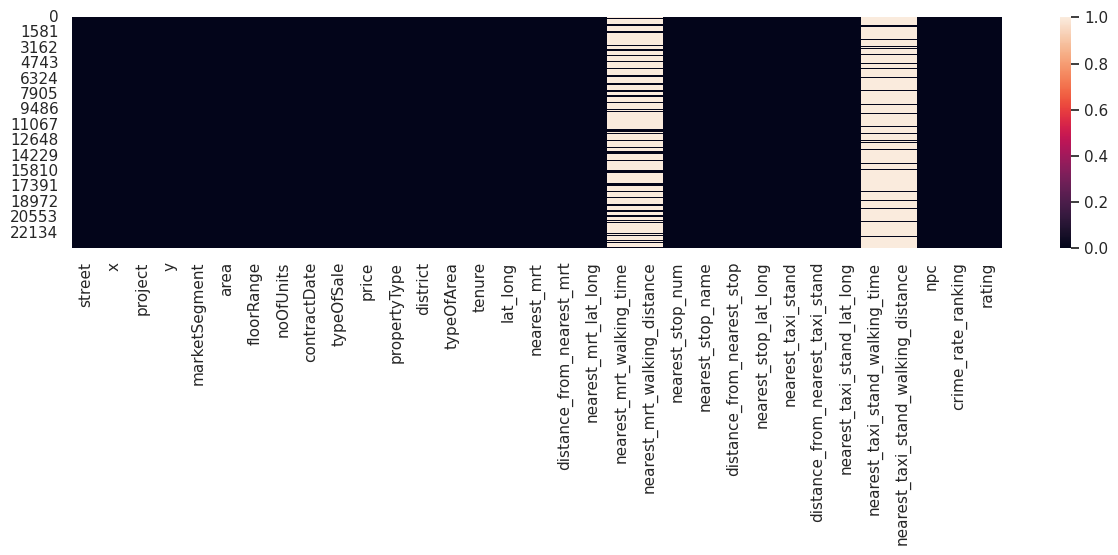

In [ ]:
plt.figure(figsize = (15,3))
sns.set(font_scale=1)
heatmap = sns.heatmap(property_data.isnull(), xticklabels=True)
plt.show()

## Categorical Analysis

###Categorical Analysis

In [ ]:
categoricals = ['marketSegment', 'floorRange', 'typeOfSale', 'propertyType', 'district', 'typeOfArea', 'tenure', 'nearest_mrt', 'npc', 'crime_rate_ranking'] 
                # street, project, nearest_mrt_lat_long, nearest_stop_name, nearest_stop_lat_long, nearest_taxi_stand, nearest_taxi_stand_lat_long excluded due to large number of categories

In [ ]:
alignment = len(max(categoricals, key=len))
for cat in categoricals:
    print(f"{cat.ljust(alignment)}: {property_data[cat].unique()}")

marketSegment     : ['RCR' 'CCR' 'OCR']
floorRange        : ['-' '1-May' '6-Oct' '21-25' '31-35' '26-30' '16-20' '36-40' 'Nov-15'
 '41-45' '61-65' '56-60' '46-50' '51-55' 'B1-B5' '66-70' '71-75']
typeOfSale        : [3 1 2]
propertyType      : ['Semi-detached' 'Terrace' 'Strata Terrace' 'Condominium' 'Detached'
 'Apartment' 'Strata Semi-detached' 'Strata Detached']
district          : [5 4 3 2 7 1 6]
typeOfArea        : ['Land' 'Strata']
tenure            : ['Freehold' '99 yrs lease commencing from 2007'
 '99 yrs lease commencing from 2016' '9999 yrs lease commencing from 1963'
 '99 yrs lease commencing from 1976' '99 yrs lease commencing from 2014'
 '99 yrs lease commencing from 2006' '99 yrs lease commencing from 2005'
 '99 yrs lease commencing from 2011' '99 yrs lease commencing from 2019'
 '99 yrs lease commencing from 1996' '99 yrs lease commencing from 2008'
 '99 yrs lease commencing from 2018' '956 yrs lease commencing from 1928'
 '99 yrs lease commencing from 2002' '99 yrs leas

In [ ]:
total = property_data['floorRange'].count()
percentage = property_data.groupby('floorRange')['floorRange'].count() / total * 100
percentage.sort_values(ascending=False)

floorRange
1-May     22.959119
6-Oct     17.702401
Nov-15    14.854660
16-20     13.053200
21-25     10.458592
26-30      6.636291
31-35      5.476100
36-40      3.286504
-          2.172721
41-45      1.569422
46-50      0.826900
51-55      0.582205
56-60      0.236257
61-65      0.109691
66-70      0.054845
B1-B5      0.012657
71-75      0.008438
Name: floorRange, dtype: float64

'1-May', '6-Oct' and 'Nov-15' consists the bulk of the data for the floorRange column at 23.0%, 17.7% and 14.9% respectively. '-' is at 2.2% and 'B1-B5' is at 0.01%.

'1-May', '6-Oct' and 'Nov-15' seems to be formatted as dates instead of floor range. As such, they will be converted to their respective ranges according to the floorRange column such as '01-05', '06-10', '11-15'. Upon further inspection, '-' represents no floor since the property is a landed one whereas 'B1-B5' represents '01-05' and is a naming convention for that 0.01% of properties. '-' will thus be converted to '00-00' and 'B1-B5' will be converted to '01-05'. To visualise floor range later on, we will pre-process and impute the data for floorRange first for EDA.

In [ ]:
property_data['floorRange'] = property_data['floorRange'].str.replace('1-May','01-05')
property_data['floorRange'] = property_data['floorRange'].str.replace('6-Oct','06-10')
property_data['floorRange'] = property_data['floorRange'].str.replace('Nov','11')
property_data['floorRange'] = property_data['floorRange'].replace(['-'], '00-00') # - means no floor like landed property
property_data['floorRange'] = property_data['floorRange'].replace(['B1-B5'], '01-05') # B is a naming convention of a floor

In [ ]:
property_data['floorRange'].value_counts()

01-05    5445
06-10    4196
11-15    3521
16-20    3094
21-25    2479
26-30    1573
31-35    1298
36-40     779
00-00     515
41-45     372
46-50     196
51-55     138
56-60      56
61-65      26
66-70      13
71-75       2
Name: floorRange, dtype: int64

###Data Visualisations

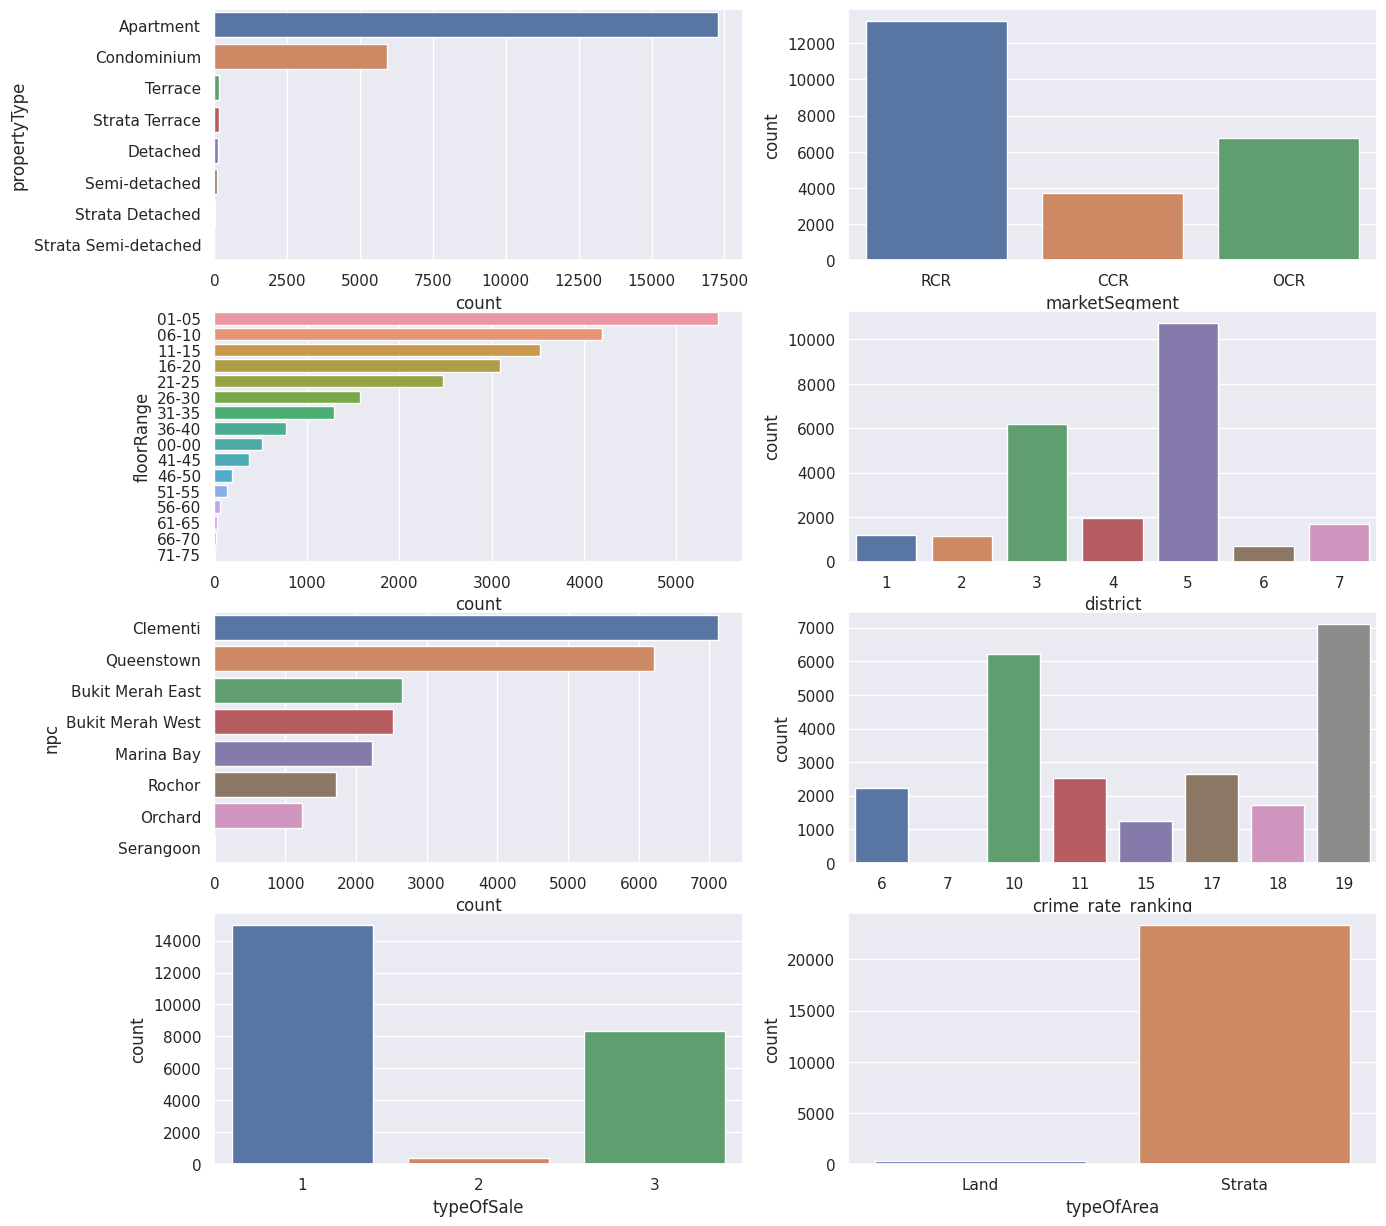

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.countplot(ax=axes[0, 0], y = 'propertyType', data = property_data, order=property_data.propertyType.value_counts().index)
sns.countplot(ax=axes[0, 1], x = 'marketSegment', data = property_data)
sns.countplot(ax=axes[1, 0], y = 'floorRange', data = property_data, order=property_data.floorRange.value_counts().index)
sns.countplot(ax=axes[1, 1], x = 'district', data = property_data)
sns.countplot(ax=axes[2, 0], y = 'npc', data = property_data, order=property_data.npc.value_counts().index)
sns.countplot(ax=axes[2, 1], x = 'crime_rate_ranking', data = property_data)
sns.countplot(ax=axes[3, 0], x = 'typeOfSale', data = property_data)
sns.countplot(ax=axes[3, 1], x = 'typeOfArea', data = property_data)
plt.show()

typeOfSale - The type of sale

*   1 – New Sale
*   2 – Sub Sale
*   3 – Resale

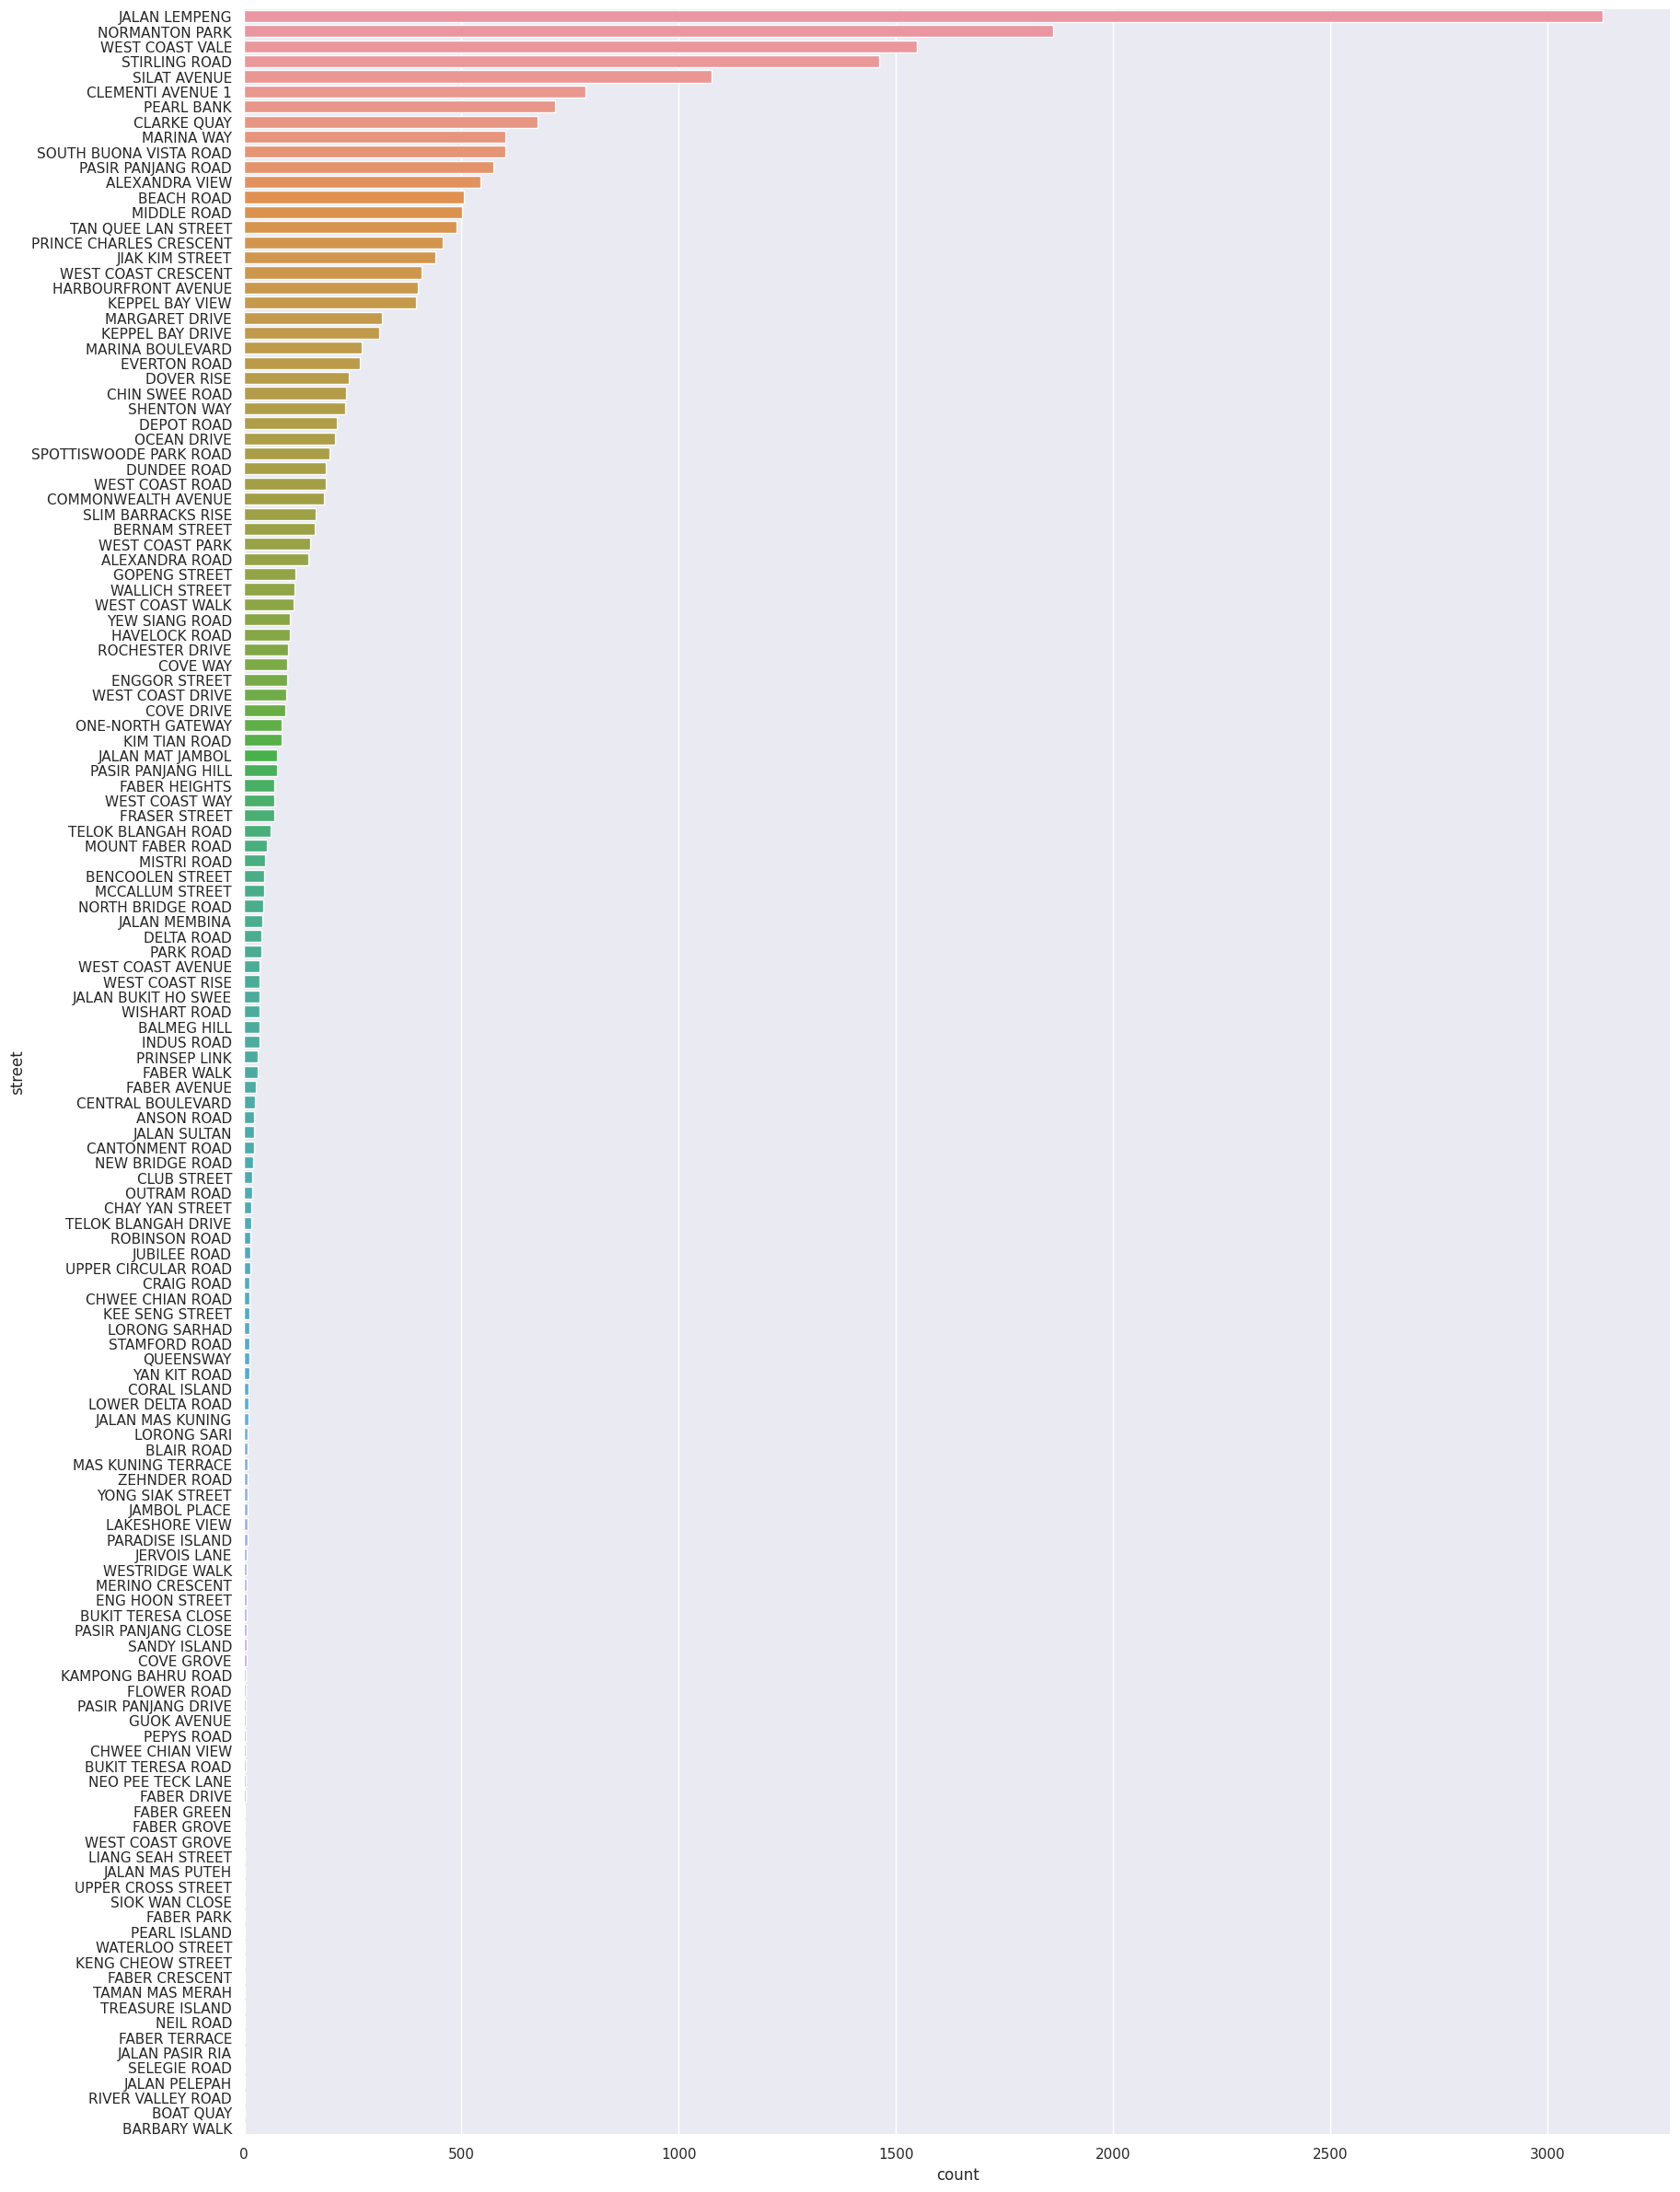

In [ ]:
plt.figure(figsize=(20,30))
sns.countplot(y=property_data['street'],order=property_data.street.value_counts().index)
plt.show()

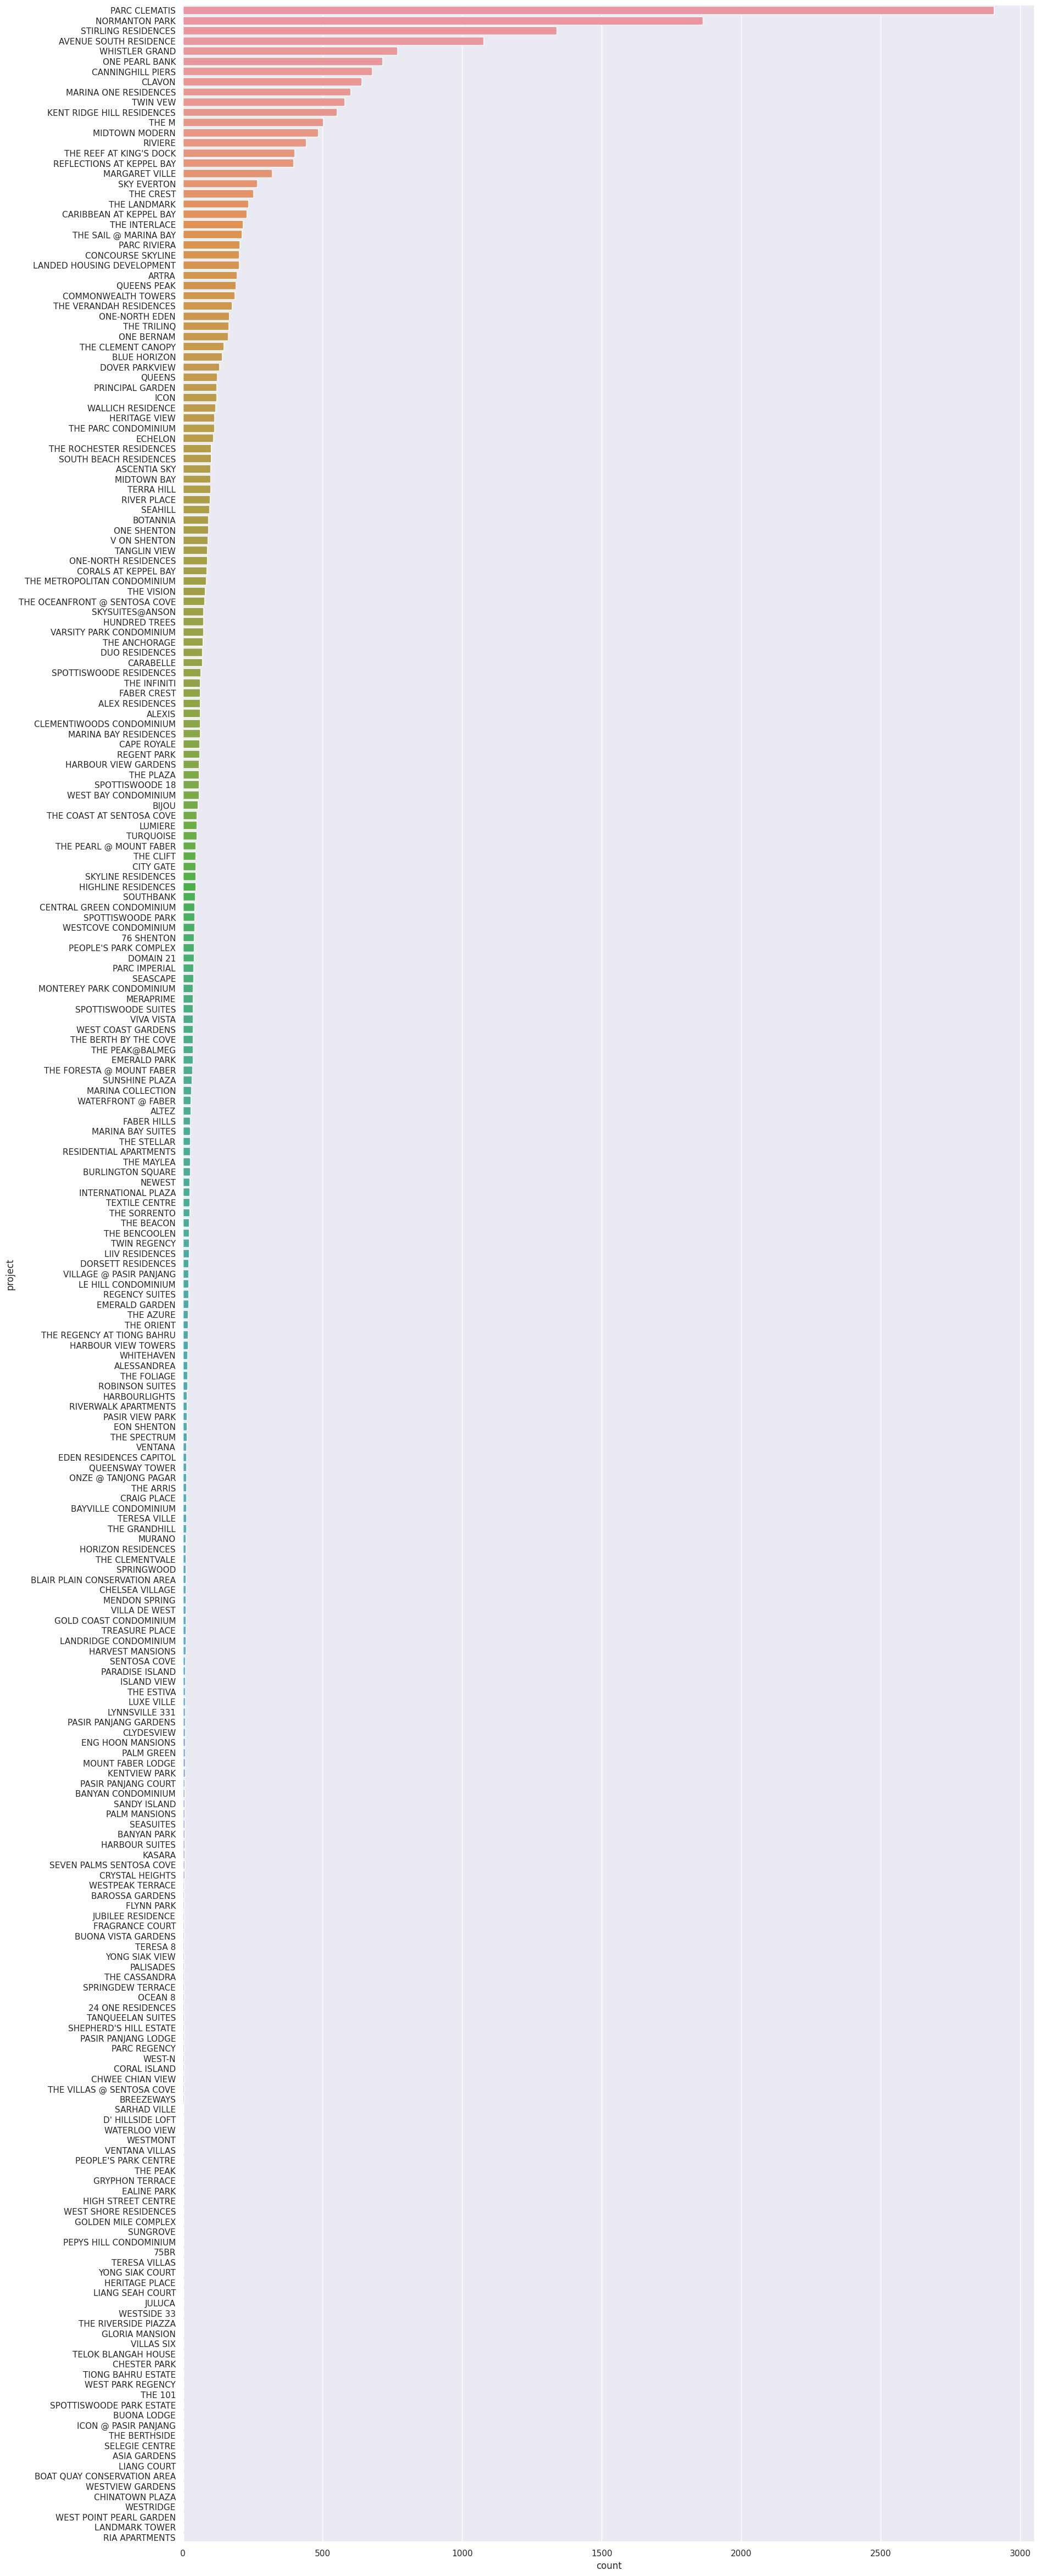

In [ ]:
plt.figure(figsize=(20,60))
sns.countplot(y=property_data['project'],order=property_data.project.value_counts().index)
plt.show()

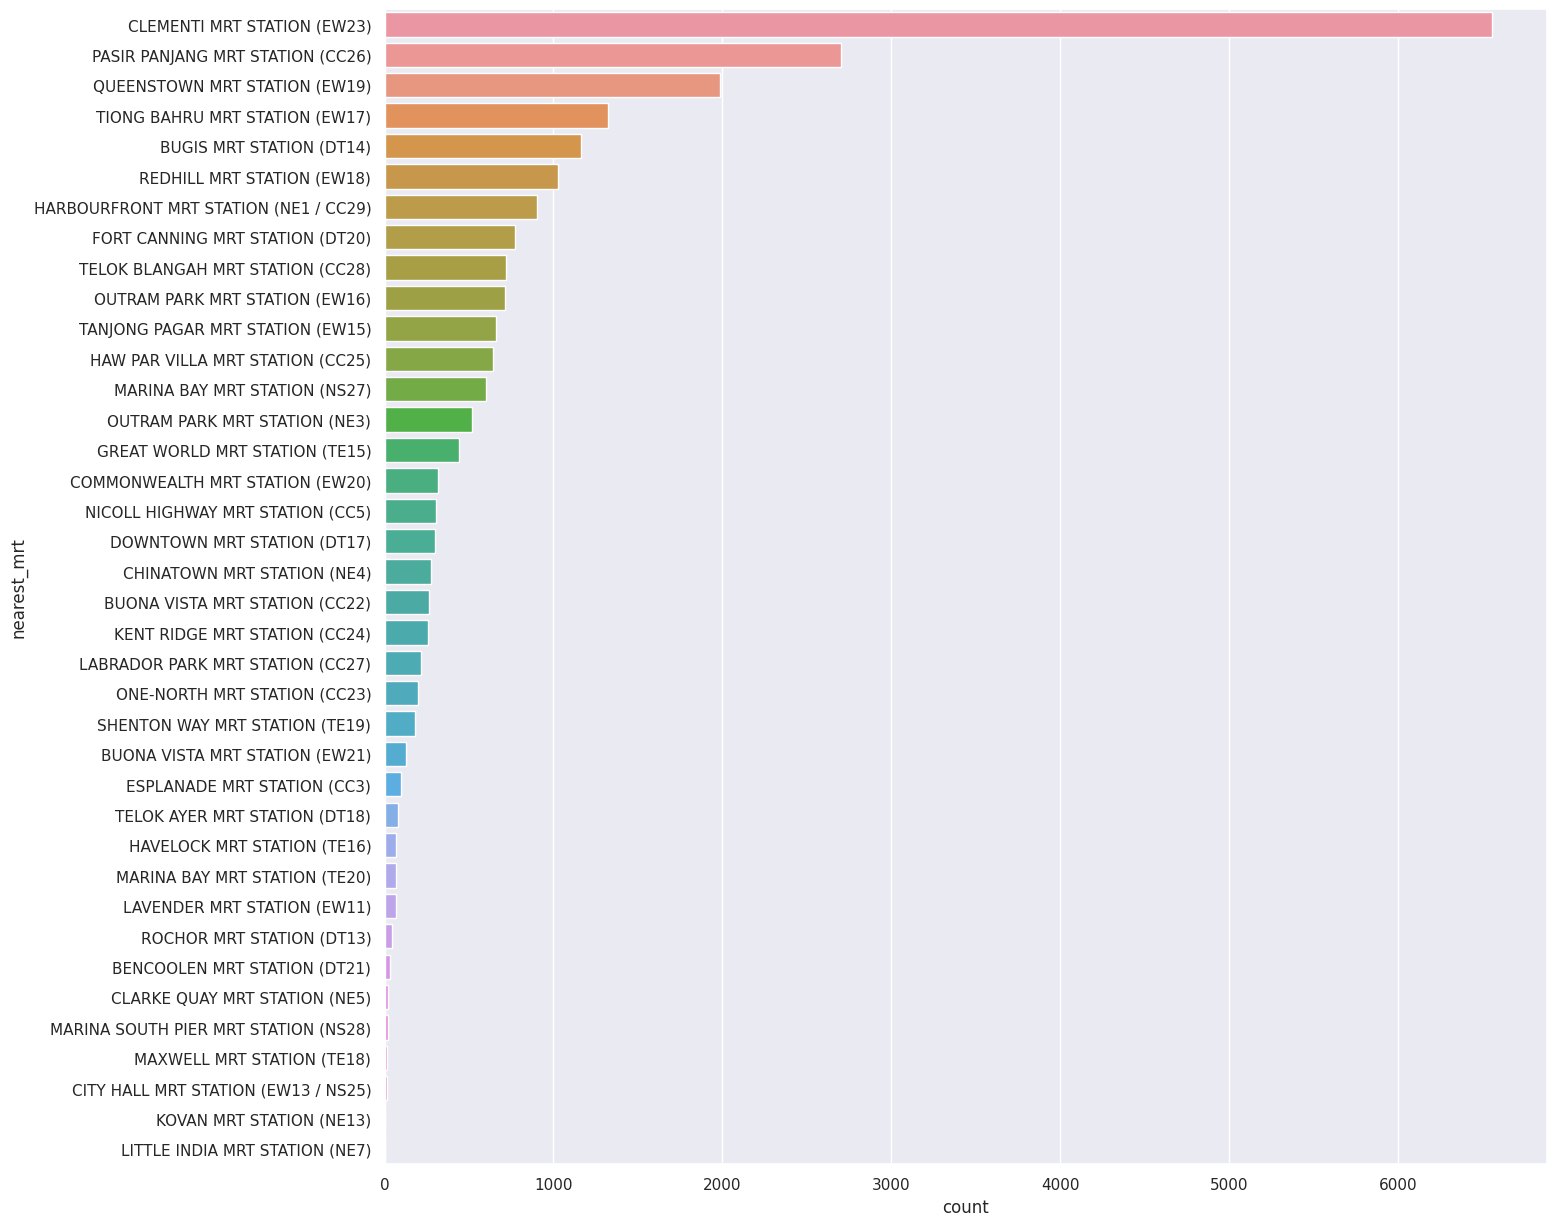

In [ ]:
plt.figure(figsize=(15, 15))
sns.countplot(y = 'nearest_mrt', data = property_data, order=property_data.nearest_mrt.value_counts().index)
plt.show()

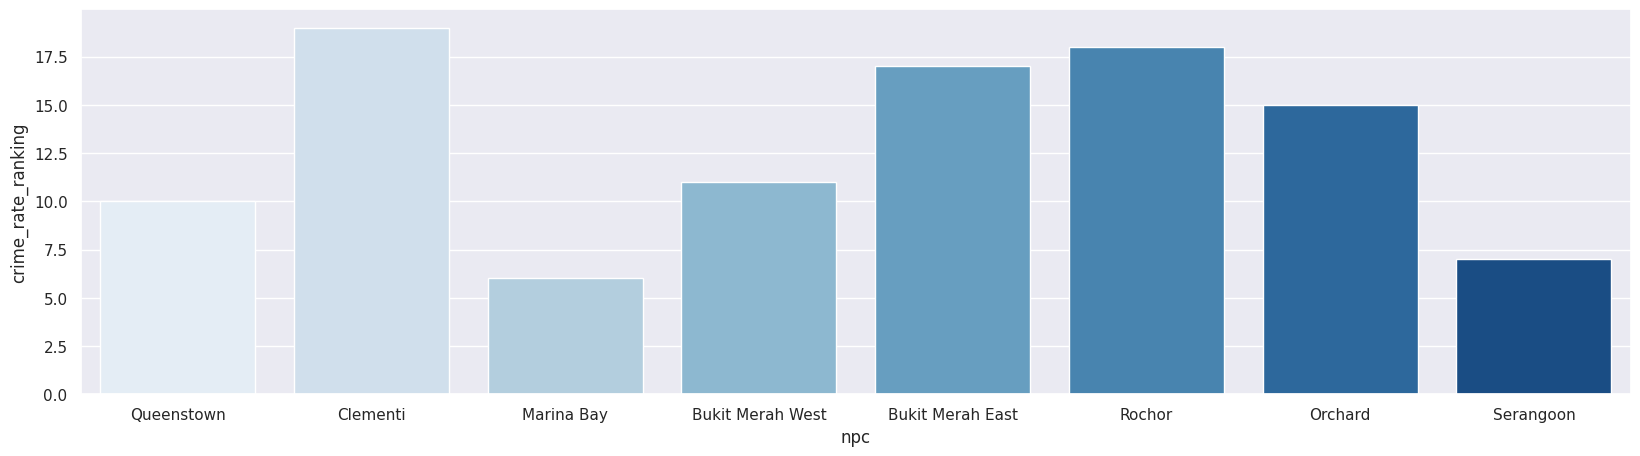

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'npc',
            y = 'crime_rate_ranking',
            data = property_data,
            palette = "Blues")
plt.show()

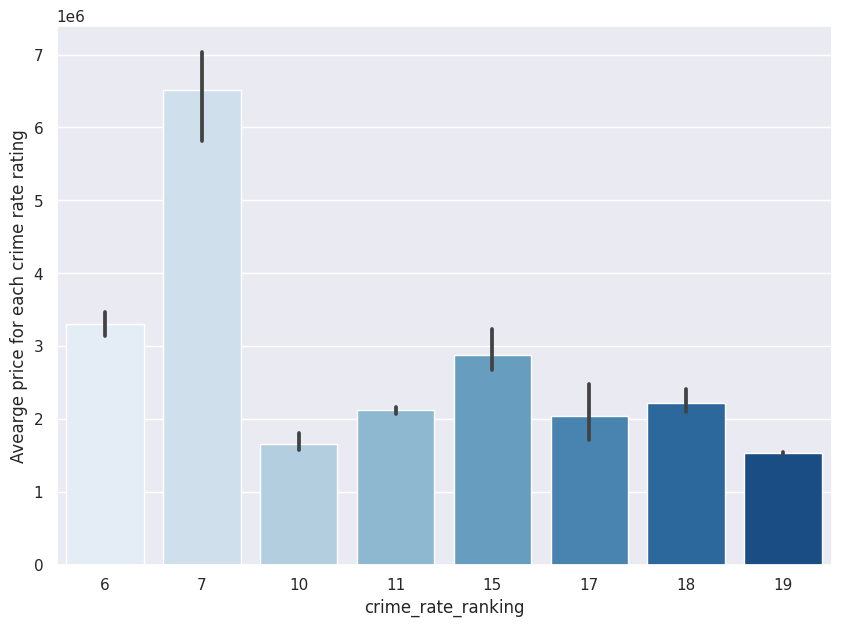

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'crime_rate_ranking',
            y = 'price',
            data = property_data,
            palette = "Blues")
ax.set(ylabel='Avearge price for each crime rate rating')
plt.show()

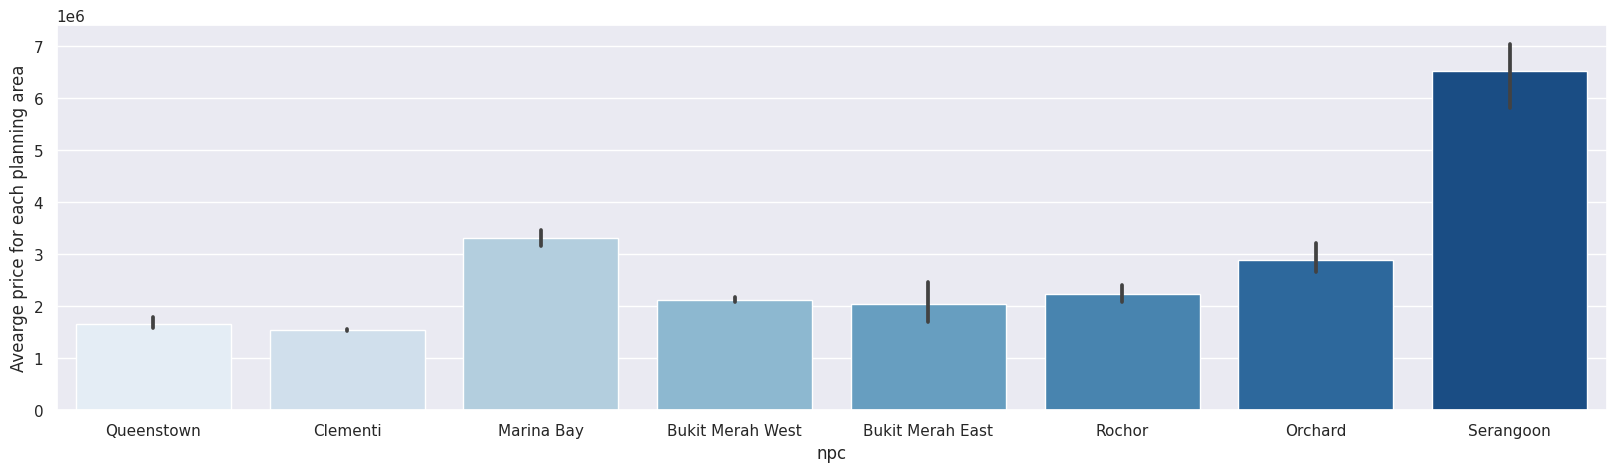

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'npc',
            y = 'price',
            data = property_data,
            palette = "Blues")
ax.set(ylabel='Avearge price for each planning area')
plt.show()

## Numerical Analysis

In [ ]:
numericals = ['x', 'y', 'area', 'noOfUnits', 'price', 'district', 'distance_from_nearest_mrt', 'nearest_mrt_walking_time', 'nearest_mrt_walking_distance', 'nearest_stop_num', 'distance_from_nearest_stop', 'distance_from_nearest_taxi_stand', 'nearest_taxi_stand_walking_time', 'nearest_taxi_stand_walking_distance', 'rating']

In [ ]:
property_data.describe()

,x,y,area,noOfUnits,contractDate,typeOfSale,price,district,distance_from_nearest_mrt,nearest_mrt_walking_time,nearest_mrt_walking_distance,nearest_stop_num,distance_from_nearest_stop,distance_from_nearest_taxi_stand,nearest_taxi_stand_walking_time,nearest_taxi_stand_walking_distance,crime_rate_ranking,rating
count,23702.000000,23702.000000,23703.000000,23703.000000,23703.000000,23703.000000,2.370300e+04,23703.000000,23703.000000,5425.000000,5425.000000,23703.000000,23703.000000,23703.000000,2392.000000,2392.000000,23703.000000,23703.000000
mean,24739.886311,30623.119153,101.507189,1.027802,671.304729,1.720921,1.973381e+06,4.215374,0.676807,14.022488,0.822673,13840.442898,0.186945,0.684646,13.027174,0.643813,14.056913,4.184107
std,3873.094934,1884.995814,287.283816,1.799791,342.728098,0.951816,4.642810e+06,1.447642,0.553547,13.079878,1.087388,9702.860604,0.272082,0.566615,12.135221,0.997808,4.570952,0.280902
min,19027.871530,24528.350540,30.000000,1.000000,119.000000,1.000000,4.650000e+05,1.000000,0.061908,1.000000,0.000000,1039.000000,0.012615,0.031138,0.000000,0.000000,6.000000,4.000000
25%,20628.928430,29259.728610,61.000000,1.000000,418.000000,1.000000,1.200000e+06,3.000000,0.275806,4.000000,0.000000,10021.000000,0.087684,0.216077,4.000000,0.000000,10.000000,4.000000
50%,24800.931590,30394.289680,82.000000,1.000000,718.000000,1.000000,1.550000e+06,5.000000,0.568703,12.000000,1.000000,14151.000000,0.151014,0.595372,10.000000,0.000000,15.000000,4.100000
75%,28537.889040,32314.265680,113.000000,1.000000,921.000000,3.000000,2.102000e+06,5.000000,1.064407,19.000000,1.000000,18141.000000,0.197689,1.050890,14.000000,1.000000,19.000000,4.200000
max,33093.909000,38161.986070,32931.000000,193.000000,1222.000000,3.000000,3.710000e+08,7.000000,3.387580,64.000000,5.000000,80161.000000,2.342867,3.435779,65.000000,5.000000,19.000000,4.800000


In [ ]:
property_data.corr() > 0.5

,x,y,area,noOfUnits,contractDate,typeOfSale,price,district,distance_from_nearest_mrt,nearest_mrt_walking_time,nearest_mrt_walking_distance,nearest_stop_num,distance_from_nearest_stop,distance_from_nearest_taxi_stand,nearest_taxi_stand_walking_time,nearest_taxi_stand_walking_distance,crime_rate_ranking,rating
x,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
y,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
area,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
noOfUnits,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
contractDate,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
typeOfSale,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
price,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
district,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
distance_from_nearest_mrt,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False,False
nearest_mrt_walking_time,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,True,False,False


<Axes: xlabel='price', ylabel='Count'>

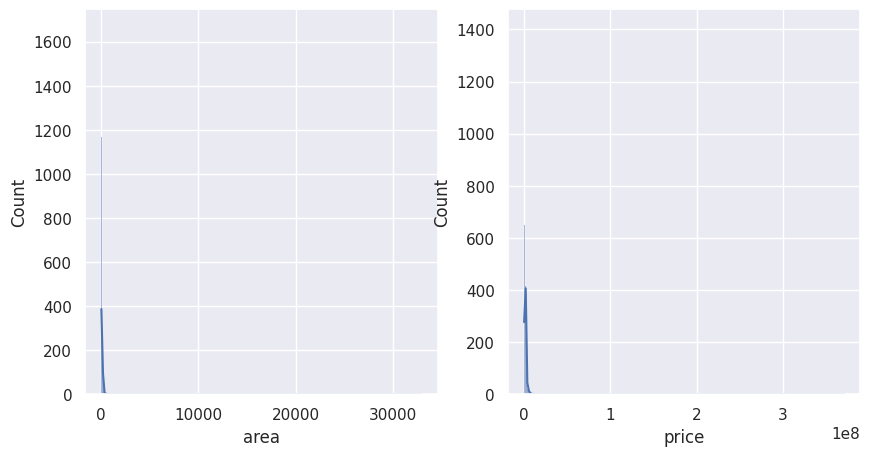

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=property_data, x="area", kde=True)
sns.histplot(ax=axes[1], data=property_data, x="price", kde=True)

In [ ]:
def analyse_numericals(df, numericals):
    num_columns = 4
    num_rows = math.ceil(len(numericals) / num_columns)
    
    fig, ax = plt.subplots(num_rows, num_columns, figsize=(30,num_rows*6))

    for row in range(num_rows):
        for col in range(num_columns):
            index = row*num_columns + col
            if index >= len(numericals):
                fig.delaxes(ax[row, col])
            else:
                ax[row, col].boxplot(df[numericals[index]])
                ax[row, col].set_title("Box plot of {}".format(numericals[index]))
    plt.show()

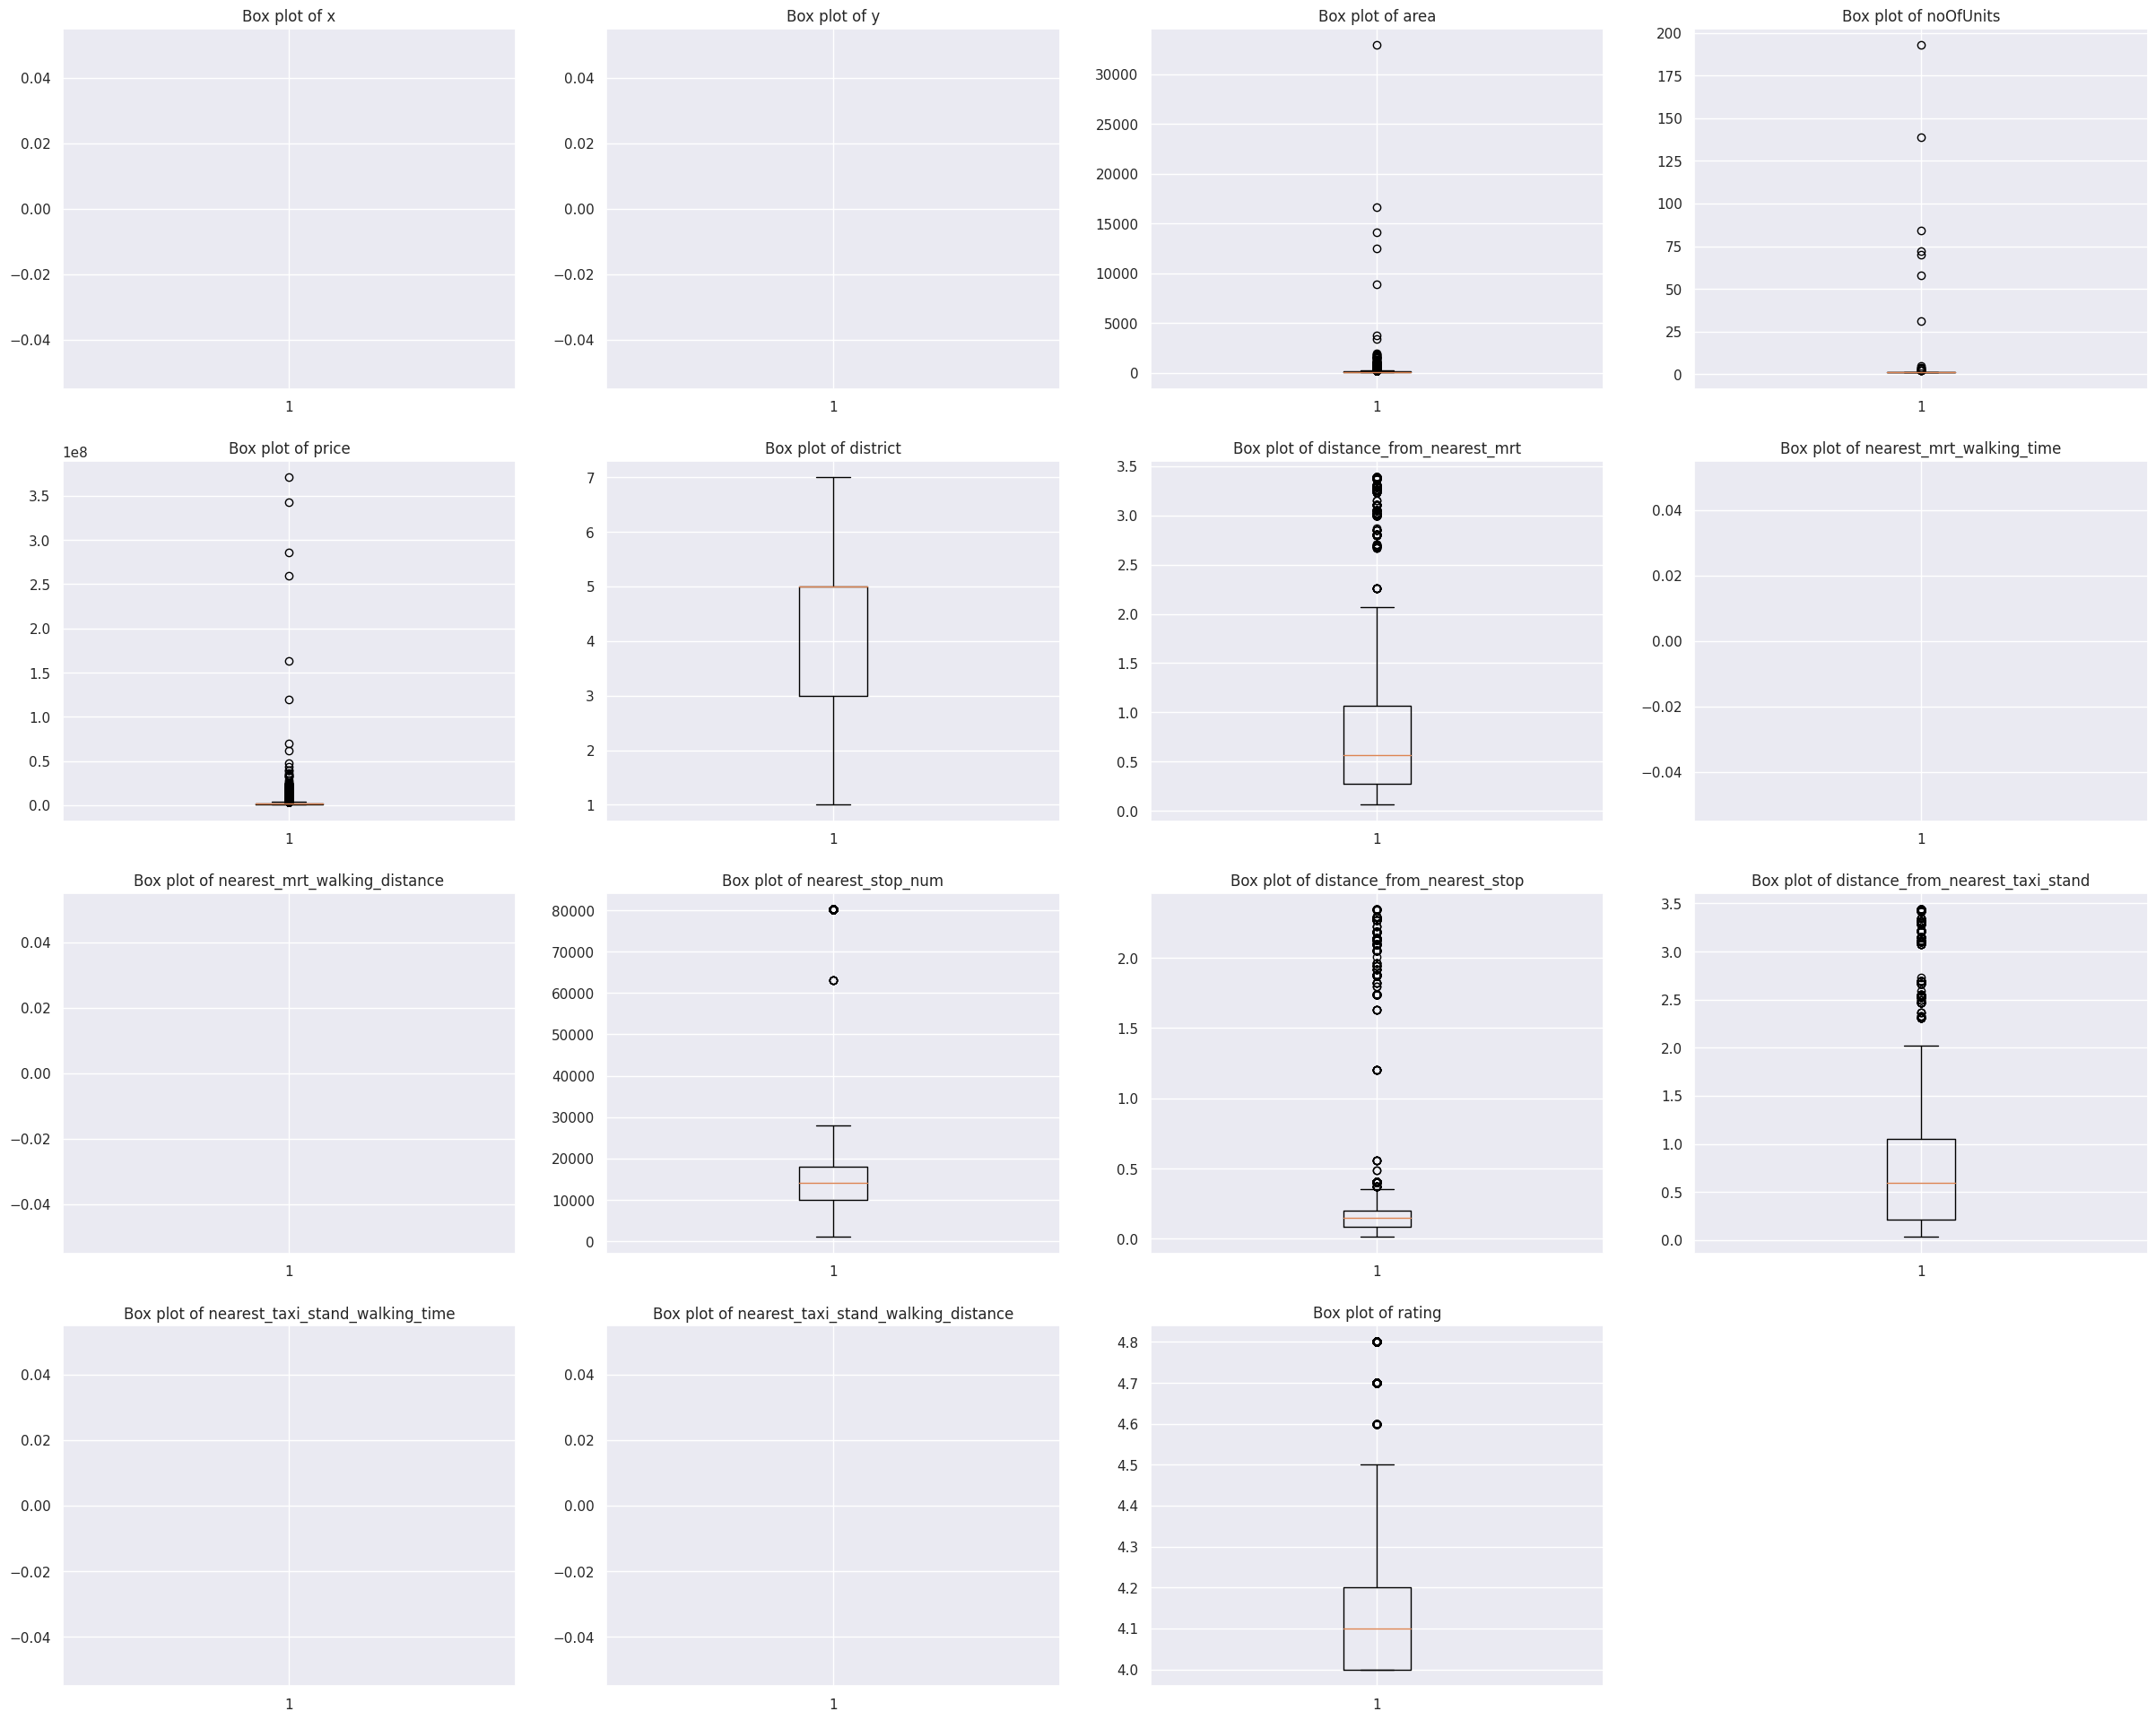

In [ ]:
analyse_numericals(property_data, numericals)

###Outlier Analysis

In [ ]:
def count_outliers(df, numericals):
    outliers_count = [0] * len(numericals)
    column_names = []
    threshold = 3 # this is the standard
    for i in range(len(numericals)):
        z_scores = (df[numericals[i]] - df[numericals[i]].mean()) / df[numericals[i]].std()
        outliers = df[abs(z_scores) > threshold]
        outliers_count[i] = outliers[numericals[i]].count()
    
    print(pd.DataFrame(outliers_count, index=numericals, columns=["Number of outliers"]))

In [ ]:
count_outliers(property_data, numericals)

                                     Number of outliers
x                                                     0
y                                                   136
area                                                 32
noOfUnits                                             7
price                                                74
district                                              0
distance_from_nearest_mrt                           438
nearest_mrt_walking_time                             39
nearest_mrt_walking_distance                         33
nearest_stop_num                                    303
distance_from_nearest_stop                          446
distance_from_nearest_taxi_stand                    432
nearest_taxi_stand_walking_time                      20
nearest_taxi_stand_walking_distance                  20
rating                                                0


# Pre-processing

##Data Imputation

In [ ]:
property_data[property_data.x.isnull()]

,street,x,project,y,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,...,distance_from_nearest_stop,nearest_stop_lat_long,nearest_taxi_stand,distance_from_nearest_taxi_stand,nearest_taxi_stand_lat_long,nearest_taxi_stand_walking_time,nearest_taxi_stand_walking_distance,npc,crime_rate_ranking,rating
14251,EVERTON ROAD,NaN,ASIA GARDENS,NaN,RCR,12488.0,11-15,84,418,3,...,0.155593,"(1.27744837946643, 103.83838894560753)",Hoe Chiang Rd at Keppel Tower,0.470891,"(1.274215422, 103.84201)",NaN,NaN,Bukit Merah East,17,4.1


In [ ]:
property_data.loc[14251, ['x', 'y']] = {'x': 28681.249, 'y': 29130.522} #SVY21 format of lat_long

In [ ]:
property_data['nearest_mrt_walking_distance'].mean()

0.8229251149643507

In [ ]:
property_data['nearest_mrt_walking_time'].fillna(round(property_data['nearest_mrt_walking_time'].mean(), 3), inplace=True)
property_data['nearest_mrt_walking_distance'].fillna(round(property_data['nearest_mrt_walking_distance'].mean(), 3), inplace=True)
property_data['nearest_taxi_stand_walking_time'].fillna(round(property_data['nearest_taxi_stand_walking_time'].mean(), 3), inplace=True)
property_data['nearest_taxi_stand_walking_distance'].fillna(round(property_data['nearest_taxi_stand_walking_distance'].mean(), 3), inplace=True)
property_data.isnull().sum()

street                                 0
x                                      0
project                                0
y                                      0
marketSegment                          0
area                                   0
floorRange                             0
noOfUnits                              0
contractDate                           0
typeOfSale                             0
price                                  0
propertyType                           0
district                               0
typeOfArea                             0
tenure                                 0
lat_long                               0
nearest_mrt                            0
distance_from_nearest_mrt              0
nearest_mrt_lat_long                   0
nearest_mrt_walking_time               0
nearest_mrt_walking_distance           0
nearest_stop_num                       0
nearest_stop_name                      0
distance_from_nearest_stop             0
nearest_stop_lat

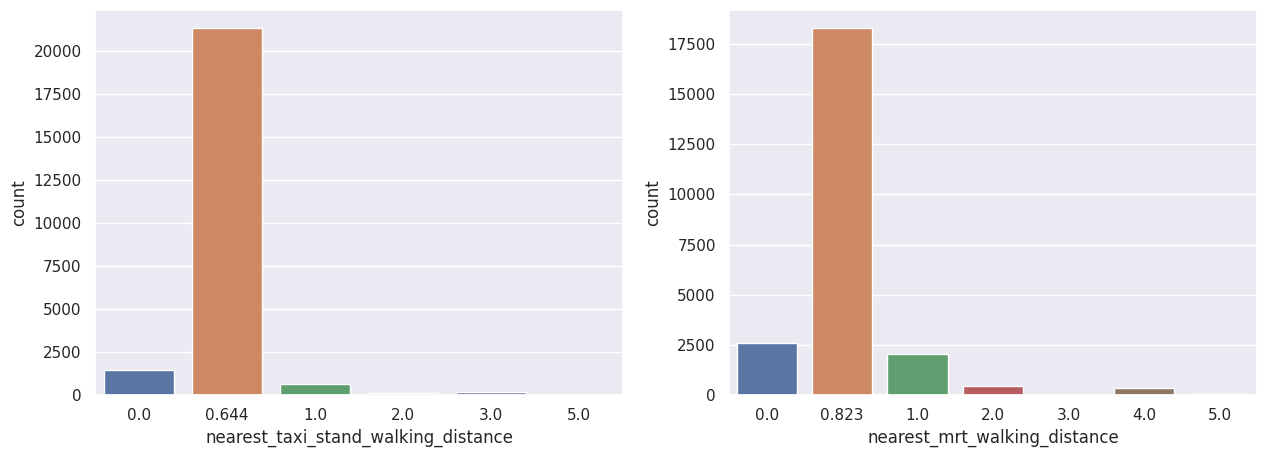

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], x = 'nearest_taxi_stand_walking_distance', data = property_data)
sns.countplot(ax=axes[1], x = 'nearest_mrt_walking_distance', data = property_data)
plt.show()

##Feature Engineering

In [ ]:
property_data['floorRange'].value_counts()

01-05    5445
06-10    4196
11-15    3521
16-20    3094
21-25    2479
26-30    1573
31-35    1298
36-40     779
00-00     515
41-45     372
46-50     196
51-55     138
56-60      56
61-65      26
66-70      13
71-75       2
Name: floorRange, dtype: int64

In [ ]:
property_data['start_level'] = property_data['floorRange'].str[0:2].astype(int)
property_data['start_level'].value_counts()

1     5445
6     4196
11    3521
16    3094
21    2479
26    1573
31    1298
36     779
0      515
41     372
46     196
51     138
56      56
61      26
66      13
71       2
Name: start_level, dtype: int64

In [ ]:
property_data['end_level'] = property_data['floorRange'].str[-2:].astype(int)
property_data['end_level'].value_counts()

5     5445
10    4196
15    3521
20    3094
25    2479
30    1573
35    1298
40     779
0      515
45     372
50     196
55     138
60      56
65      26
70      13
75       2
Name: end_level, dtype: int64

In [ ]:
property_data['ave_level'] = property_data['start_level'] + property_data['end_level']
property_data['ave_level'].value_counts()

6      5445
16     4196
26     3521
36     3094
46     2479
56     1573
66     1298
76      779
0       515
86      372
96      196
106     138
116      56
126      26
136      13
146       2
Name: ave_level, dtype: int64

In [ ]:
property_data['contractYear'] = property_data['contractDate'].astype(str).str[-2:].astype(int)
property_data['contractYear']

0        20
1        18
2        18
3        21
4        20
         ..
23698    22
23699    23
23700    22
23701    22
23702    22
Name: contractYear, Length: 23703, dtype: int64

In [ ]:
property_data['contractMonth'] = property_data['contractDate'].astype(str).str[:-2].astype(int)
property_data['contractMonth']

0         2
1         9
2         6
3         9
4         3
         ..
23698     8
23699     2
23700    10
23701    12
23702     2
Name: contractMonth, Length: 23703, dtype: int64

In [ ]:
property_data['tenure'].value_counts()

99 yrs lease commencing from 2019      7436
99 yrs lease commencing from 2018      2933
99 yrs lease commencing from 2017      2236
Freehold                               2186
99 yrs lease commencing from 2021      1076
99 yrs lease commencing from 2011       995
99 yrs lease commencing from 2006       695
99 yrs lease commencing from 2008       539
99 yrs lease commencing from 2012       523
99 yrs lease commencing from 2005       472
99 yrs lease commencing from 2007       394
99 yrs lease commencing from 2015       391
99 yrs lease commencing from 2002       375
99 yrs lease commencing from 2016       339
99 yrs lease commencing from 2013       320
956 yrs lease commencing from 1928      293
99 yrs lease commencing from 2020       234
99 yrs lease commencing from 2009       234
99 yrs lease commencing from 1999       228
99 yrs lease commencing from 2004       219
99 yrs lease commencing from 1996       198
99 yrs lease commencing from 1993       196
99 yrs lease commencing from 201

In [ ]:
def get_tenure_cat(x):
    if x.startswith('Freehold'):
        return 3
    elif int(x.split()[0]) <= 99:
        return 1
    else:
        return 2

In [ ]:
property_data['tenure_cat'] = property_data['tenure'].apply(get_tenure_cat)

In [ ]:
property_data['tenure_cat'].value_counts()

1    21155
3     2186
2      362
Name: tenure_cat, dtype: int64

In [ ]:
property_data.drop(['tenure'], axis=1, inplace=True)

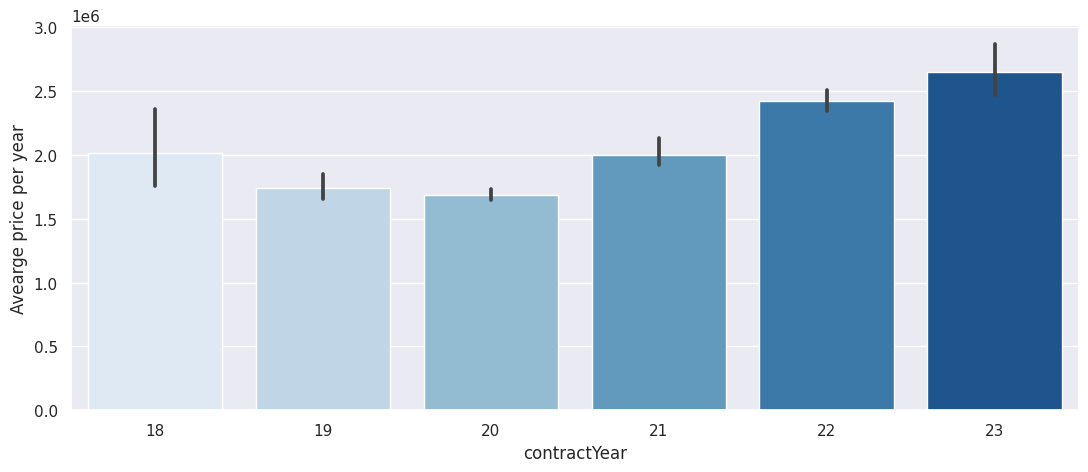

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.barplot(x = 'contractYear',
            y = 'price',
            data = property_data,
            palette = "Blues")
ax.set(ylabel='Avearge price per year')
plt.show()

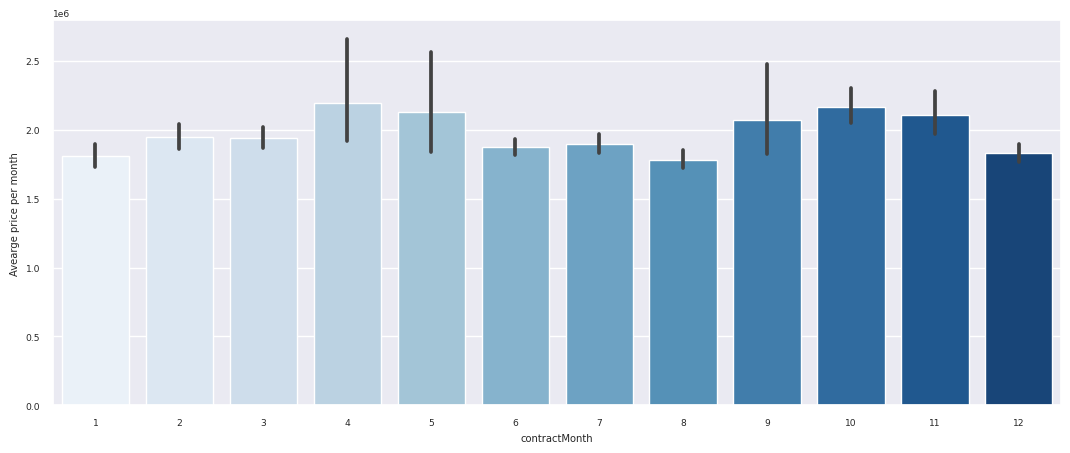

In [ ]:
plt.figure(figsize=(13,5))
sns.set(font_scale=0.6)
ax = sns.barplot(x = 'contractMonth',
            y = 'price',
            data = property_data,
            palette = "Blues")
ax.set(ylabel='Avearge price per month')
plt.show()

In [ ]:
property_data = property_data.drop(columns=['floorRange','start_level','end_level','contractDate'], axis=1)

## Collinearity

<ipython-input-84-602445376ded>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(property_data.corr(), dtype=np.bool)


<Axes: >

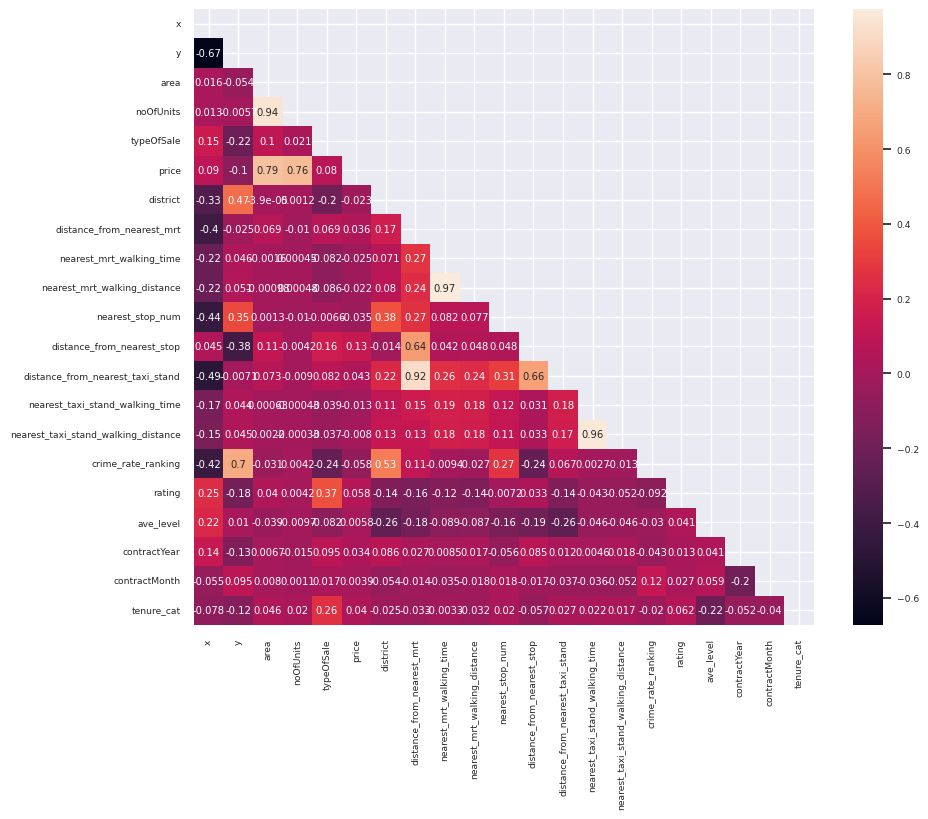

In [ ]:
plt.figure(figsize=(10, 8))
#sns.set(font_scale=0.6)

mask = np.zeros_like(property_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(property_data.corr(),annot=True,mask=mask)

<Axes: >

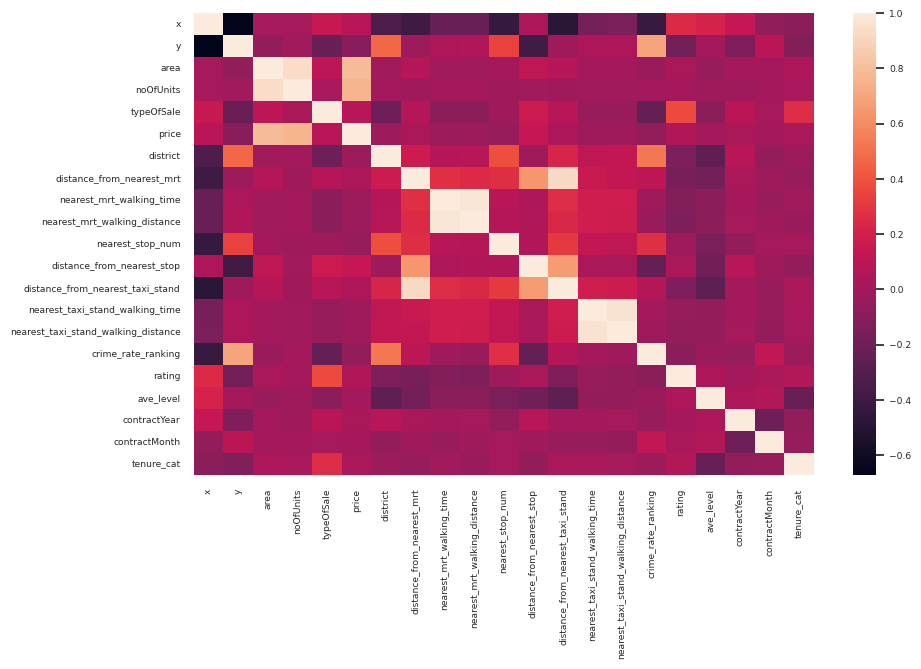

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(property_data.corr())

<Axes: xlabel='nearest_taxi_stand_walking_distance', ylabel='nearest_taxi_stand_walking_time'>

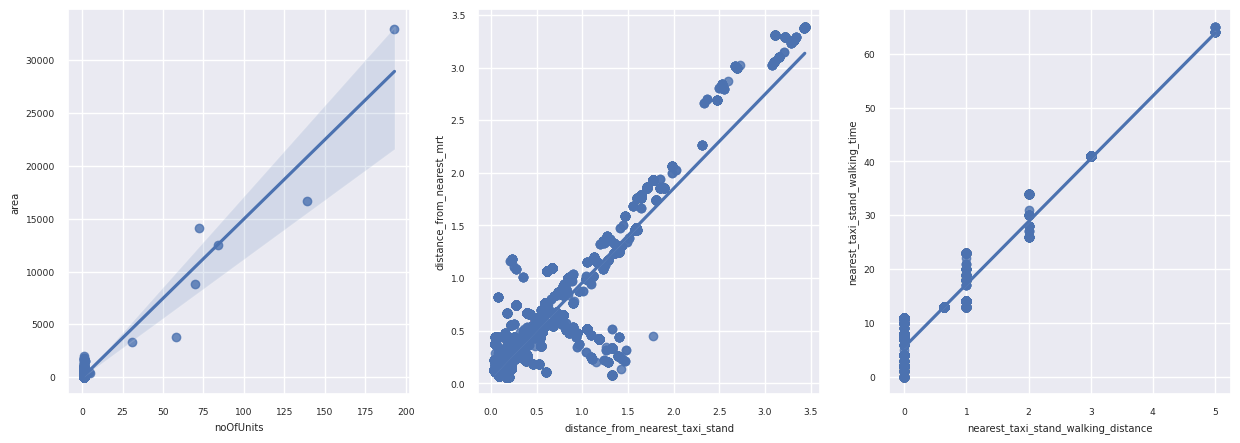

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(ax=axes[0], x='noOfUnits', y='area', data=property_data)
sns.regplot(ax=axes[1], x='distance_from_nearest_taxi_stand', y='distance_from_nearest_mrt', data=property_data)
sns.regplot(ax=axes[2], x='nearest_taxi_stand_walking_distance', y='nearest_taxi_stand_walking_time', data=property_data)

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   street                               23703 non-null  object 
 1   x                                    23703 non-null  float64
 2   project                              23703 non-null  object 
 3   y                                    23703 non-null  float64
 4   marketSegment                        23703 non-null  object 
 5   area                                 23703 non-null  float64
 6   noOfUnits                            23703 non-null  int64  
 7   typeOfSale                           23703 non-null  int64  
 8   price                                23703 non-null  int64  
 9   propertyType                         23703 non-null  object 
 10  district                             23703 non-null  int64  
 11  typeOfArea                  

Not valuable features are dropped from the dataframe

In [ ]:
property_data = property_data.drop(columns=['x','y','noOfUnits','lat_long','nearest_mrt_lat_long','nearest_stop_lat_long','nearest_taxi_stand_lat_long',
                                            'distance_from_nearest_mrt','distance_from_nearest_taxi_stand',
                                            'nearest_mrt_walking_distance','nearest_taxi_stand_walking_distance',
                                            'npc','street','project','nearest_stop_name'], axis=1)
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   marketSegment                    23703 non-null  object 
 1   area                             23703 non-null  float64
 2   typeOfSale                       23703 non-null  int64  
 3   price                            23703 non-null  int64  
 4   propertyType                     23703 non-null  object 
 5   district                         23703 non-null  int64  
 6   typeOfArea                       23703 non-null  object 
 7   nearest_mrt                      23703 non-null  object 
 8   nearest_mrt_walking_time         23703 non-null  float64
 9   nearest_stop_num                 23703 non-null  int64  
 10  distance_from_nearest_stop       23703 non-null  float64
 11  nearest_taxi_stand               23703 non-null  object 
 12  nearest_taxi_stand

## One Hot Encoding

Separate independent variables and dependent variable, do one-hot encoding on nominal variables

In [ ]:
nominal_var = ['marketSegment', 'propertyType', 'typeOfArea', 'nearest_mrt','typeOfSale','district', 'tenure_cat']
ordinal_var = ['crime_rate_ranking']
numeric_var = ['area','contractMonth','distance_from_nearest_stop','nearest_mrt_walking_time','nearest_stop_num','nearest_taxi_stand_walking_time','ave_level','contractYear', 'rating']

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(property_data[nominal_var]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
encoder_df.head()

,marketSegment_CCR,marketSegment_OCR,marketSegment_RCR,propertyType_Apartment,propertyType_Condominium,propertyType_Detached,propertyType_Semi-detached,propertyType_Strata Detached,propertyType_Strata Semi-detached,propertyType_Strata Terrace,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,tenure_cat_1,tenure_cat_2,tenure_cat_3
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
features_df = property_data[ordinal_var + numeric_var].join(encoder_df)
features_df.head()

# property_data_updated = property_data.join(encoder_df)
# property_data_updated.head()

,crime_rate_ranking,area,contractMonth,distance_from_nearest_stop,nearest_mrt_walking_time,nearest_stop_num,nearest_taxi_stand_walking_time,ave_level,contractYear,rating,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,tenure_cat_1,tenure_cat_2,tenure_cat_3
0,10,524.3,2,0.201405,56.0,15091,13.027174,0,20,4.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,10,308.0,9,0.201405,56.0,15091,13.027174,0,18,4.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10,314.0,6,0.201405,56.0,15091,13.027174,0,18,4.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10,308.0,9,0.201405,56.0,15091,13.027174,0,21,4.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,19,159.3,3,0.117683,32.0,16089,13.027174,0,20,4.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


##Train test split

In [ ]:
X = features_df
y = property_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18962, 74) (4741, 74) (18962,) (4741,)


In [ ]:
pd.DataFrame(X_train).to_csv('./X_train.csv')
pd.DataFrame(X_test).to_csv('./X_test.csv')
y_train.to_csv('./y_train.csv')
y_test.to_csv('./y_test.csv')

##SelectKBest

###Scale first

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pickle

with open("scaler.pkl", "wb") as f: 
  pickle.dump(scaler, f)

###with f_regression

In [ ]:
selector_f_regression = SelectKBest(f_regression, k=21)
X_train_selected = selector_f_regression.fit_transform(X_train_scaled, y_train)
X_test_selected = selector_f_regression.transform(X_test_scaled)

In [ ]:
selected_indices = selector_f_regression.get_support(indices=True)

In [ ]:
selected_df = features_df.iloc[:, selected_indices]
selected_df.head()

,crime_rate_ranking,area,distance_from_nearest_stop,rating,marketSegment_CCR,marketSegment_OCR,propertyType_Apartment,propertyType_Detached,typeOfArea_Land,typeOfArea_Strata,...,nearest_mrt_CLEMENTI MRT STATION (EW23),nearest_mrt_ESPLANADE MRT STATION (CC3),nearest_mrt_HARBOURFRONT MRT STATION (NE1 / CC29),nearest_mrt_LITTLE INDIA MRT STATION (NE7),nearest_mrt_MARINA BAY MRT STATION (TE20),nearest_mrt_MAXWELL MRT STATION (TE18),typeOfSale_1,typeOfSale_3,district_4,district_5
0,10,524.3,0.201405,4.8,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,10,308.0,0.201405,4.8,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,10,314.0,0.201405,4.8,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,10,308.0,0.201405,4.8,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,19,159.3,0.117683,4.6,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
selected_df.columns

Index(['crime_rate_ranking', 'area', 'distance_from_nearest_stop', 'rating',
       'marketSegment_CCR', 'marketSegment_OCR', 'propertyType_Apartment',
       'propertyType_Detached', 'typeOfArea_Land', 'typeOfArea_Strata',
       'nearest_mrt_CITY HALL MRT STATION (EW13 / NS25)',
       'nearest_mrt_CLEMENTI MRT STATION (EW23)',
       'nearest_mrt_ESPLANADE MRT STATION (CC3)',
       'nearest_mrt_HARBOURFRONT MRT STATION (NE1 / CC29)',
       'nearest_mrt_LITTLE INDIA MRT STATION (NE7)',
       'nearest_mrt_MARINA BAY MRT STATION (TE20)',
       'nearest_mrt_MAXWELL MRT STATION (TE18)', 'typeOfSale_1',
       'typeOfSale_3', 'district_4', 'district_5'],
      dtype='object')

In [ ]:
feature_scores = selector_f_regression.scores_[selector_f_regression.get_support()]

print(feature_scores)
print(feature_scores.mean())

[   70.92753685 29450.10459472   382.9542623     79.75982446
   156.88412128    73.58218034    62.51337773   919.89743268
   494.3674658    494.3674658     47.57826198    73.54536164
    90.47609694   101.30023588   723.56848882   206.78788565
   289.76943668   117.51046801   131.61113444   159.25807912
   105.4046479 ]
1630.1032551903384


In [ ]:
with open("selectkbest_f_regression.pkl", "wb") as f: 
  pickle.dump(selector_f_regression, f)

###with mutual_info_regression

In [ ]:
selector_mutual_info_regression = SelectKBest(mutual_info_regression, k=21)
X_train_selected = selector_mutual_info_regression.fit_transform(X_train_scaled, y_train)
X_test_selected = selector_mutual_info_regression.transform(X_test_scaled)

In [ ]:
selected_indices = selector_mutual_info_regression.get_support(indices=True)

In [ ]:
selected_df = features_df.iloc[:, selected_indices]
selected_df.head()

,crime_rate_ranking,area,contractMonth,distance_from_nearest_stop,nearest_mrt_walking_time,nearest_stop_num,nearest_taxi_stand_walking_time,ave_level,contractYear,rating,...,marketSegment_OCR,marketSegment_RCR,propertyType_Apartment,propertyType_Condominium,nearest_mrt_CLEMENTI MRT STATION (EW23),nearest_mrt_PASIR PANJANG MRT STATION (CC26),typeOfSale_1,typeOfSale_3,district_4,district_5
0,10,524.3,2,0.201405,56.0,15091,13.027174,0,20,4.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,10,308.0,9,0.201405,56.0,15091,13.027174,0,18,4.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,10,314.0,6,0.201405,56.0,15091,13.027174,0,18,4.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,10,308.0,9,0.201405,56.0,15091,13.027174,0,21,4.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,19,159.3,3,0.117683,32.0,16089,13.027174,0,20,4.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
selected_df.columns

Index(['crime_rate_ranking', 'area', 'contractMonth',
       'distance_from_nearest_stop', 'nearest_mrt_walking_time',
       'nearest_stop_num', 'nearest_taxi_stand_walking_time', 'ave_level',
       'contractYear', 'rating', 'marketSegment_CCR', 'marketSegment_OCR',
       'marketSegment_RCR', 'propertyType_Apartment',
       'propertyType_Condominium', 'nearest_mrt_CLEMENTI MRT STATION (EW23)',
       'nearest_mrt_PASIR PANJANG MRT STATION (CC26)', 'typeOfSale_1',
       'typeOfSale_3', 'district_4', 'district_5'],
      dtype='object')

In [ ]:
feature_scores = selector_mutual_info_regression.scores_[selector_mutual_info_regression.get_support()]

print(feature_scores)
print(feature_scores.mean())

[0.22292662 1.07734058 0.09796921 0.55129321 0.10179062 0.51885822
 0.04715674 0.16874463 0.12070147 0.12632748 0.07691609 0.06860077
 0.05973242 0.12157788 0.10425918 0.07051043 0.05149967 0.24559853
 0.23027463 0.04639686 0.08698562]
0.19978385140108157


In [ ]:
with open("selectkbest_mutual_info_regression.pkl", "wb") as f: 
  pickle.dump(selector_mutual_info_regression, f)